# Задание 1 к курсу "Разработка программных модулей и приложений для серверов"

Установите требуемые модули из `requirements.txt` и импортируйте требуемые модули

In [3]:
%pip install -r requirements.txt

import requests
import matplotlib.pyplot as plt
from IPython import display
from io import BytesIO
import numpy as np


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


[Useless facts API](https://uselessfacts.jsph.pl/) - выдает случайный бесполезный факт

In [13]:
url = 'https://uselessfacts.jsph.pl/api/v2/facts/random'

response = requests.get(url)


Используя header `'Accept'` с параметрами `'text/plain'` или `'application/json'` можно получить ответ в разном формате.

In [14]:
response.content

b'{"id":"d4cafb9ea7ec596194a1cb4a93736911","text":"2,000 pounds of space dust and other space debris fall on the Earth every day.","source":"djtech.net","source_url":"http://www.djtech.net/humor/useless_facts.htm","language":"en","permalink":"https://uselessfacts.jsph.pl/api/v2/facts/d4cafb9ea7ec596194a1cb4a93736911"}\n'

In [25]:
headers = {
    'Accept': 'text/plain'
}
response = requests.get(url, headers=headers)
response.content

b'> In a lifetime the average human produces enough quarts of spit to fill 2 swimming pools.\n\nSource: [djtech.net](http://www.djtech.net/humor/useless_facts.htm)\nVia: [uselessfacts](https://uselessfacts.jsph.pl/api/v2/facts/0cbd0eb26cf1b0f247c32417bcfc74b5)'

In [26]:
headers = {
    'Accept': 'application/json'
}
response = requests.get(url, headers=headers)
response.json()

{'id': '4dba7ea68b06030dfd95fc40e3b73fa1',
 'text': 'James Bond`s car had three different license plates in Goldfinger',
 'source': 'djtech.net',
 'source_url': 'http://www.djtech.net/humor/useless_facts.htm',
 'language': 'en',
 'permalink': 'https://uselessfacts.jsph.pl/api/v2/facts/4dba7ea68b06030dfd95fc40e3b73fa1'}

[imgflip.com/](https://imgflip.com/) - сайт с генератором мемов.

[https://imgflip.com/api](https://imgflip.com/api) - документация к API. Есть возможность бесплатно получать список доступных шаблонов и создавать мем по запросу.

In [27]:
url = 'https://api.imgflip.com/get_memes'

resp = requests.get(url)
resp.json()

{'success': True,
 'data': {'memes': [{'id': '181913649',
    'name': 'Drake Hotline Bling',
    'url': 'https://i.imgflip.com/30b1gx.jpg',
    'width': 1200,
    'height': 1200,
    'box_count': 2,
    'captions': 1180750},
   {'id': '87743020',
    'name': 'Two Buttons',
    'url': 'https://i.imgflip.com/1g8my4.jpg',
    'width': 600,
    'height': 908,
    'box_count': 3,
    'captions': 950750},
   {'id': '112126428',
    'name': 'Distracted Boyfriend',
    'url': 'https://i.imgflip.com/1ur9b0.jpg',
    'width': 1200,
    'height': 800,
    'box_count': 3,
    'captions': 987000},
   {'id': '217743513',
    'name': 'UNO Draw 25 Cards',
    'url': 'https://i.imgflip.com/3lmzyx.jpg',
    'width': 500,
    'height': 494,
    'box_count': 2,
    'captions': 521750},
   {'id': '131087935',
    'name': 'Running Away Balloon',
    'url': 'https://i.imgflip.com/261o3j.jpg',
    'width': 761,
    'height': 1024,
    'box_count': 5,
    'captions': 503000},
   {'id': '124822590',
    'name':

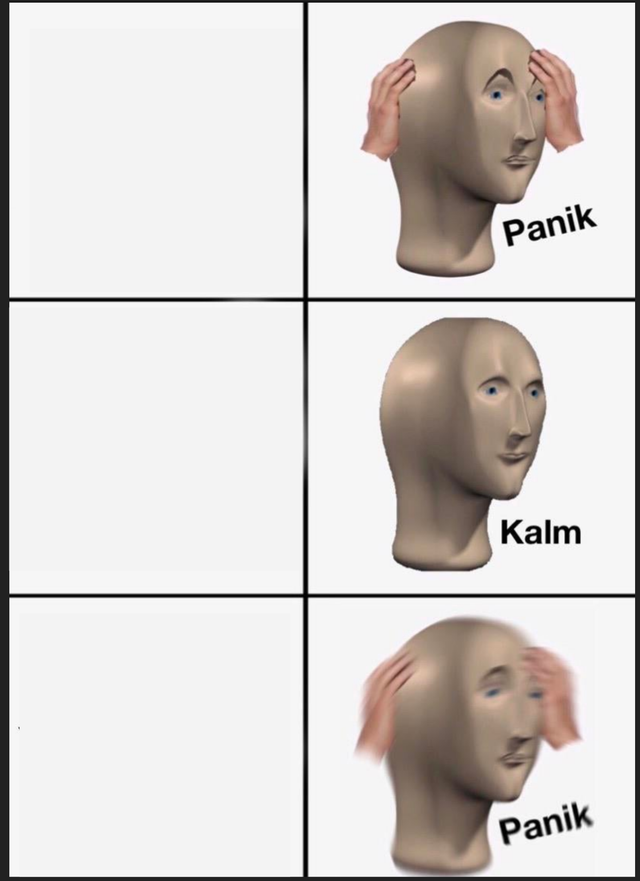

In [35]:
img = requests.get(resp.json()['data']['memes'][45]['url'])


resp.json()['data']['memes'][45]
display.Image(img.content)

In [ ]:
url = 'https://api.imgflip.com/caption_image'
params = {
    'template_id': '226297822',
    'username': 'bebebe',
    'password': 'knhasfcknhnh',
    'text0': 'уже май',
    'text1': 'скоро лето',
    'text2': 'сессия'
}

response = requests.post(url, params=params)


In [ ]:
img = requests.get(response.json()['data']['url'])

## Задание для самостоятельной работы

[ALPHA VANTAGE](https://www.alphavantage.co/) - сайт с API для доступа к биржевым данным и параметрам.

Необходимо зарегистрироваться и получить бесплатный ключ API. 

**ВАЖНО: ключ придется восстанавливать, если вы его потеряете. На сайте он отображается 1 раз. Сразу скопируйте ключ себе и сохраните!**

Получите информацию о стоимости акций компании NVIDIA (обозначение на рынке ценных бумаг **NVDA**) с частотой в 1 день.

In [19]:
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'NVDA',
    'apikey': '0IS58K6Z51AOJO84'
}

r = requests.get(url, params=params)
r

<Response [200]>

In [21]:
r.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'NVDA',
  '3. Last Refreshed': '2024-02-08',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-02-08': {'1. open': '700.7400',
   '2. high': '707.9400',
   '3. low': '694.5500',
   '4. close': '696.4100',
   '5. volume': '41106808'},
  '2024-02-07': {'1. open': '683.1900',
   '2. high': '702.2000',
   '3. low': '676.0000',
   '4. close': '700.9900',
   '5. volume': '49557455'},
  '2024-02-06': {'1. open': '696.3000',
   '2. high': '697.5399',
   '3. low': '663.0000',
   '4. close': '682.2300',
   '5. volume': '68311136'},
  '2024-02-05': {'1. open': '682.2500',
   '2. high': '694.9700',
   '3. low': '672.0500',
   '4. close': '693.3200',
   '5. volume': '68007801'},
  '2024-02-02': {'1. open': '639.7400',
   '2. high': '666.0000',
   '3. low': '636.9000',
   '4. close': '661.6000',
   '5. volume': '47657765'},
  '2024-02-01': {'1. open': '621

Выделите данные о цене закрытия торгов в течении каждого дня в отдельный массив и постройте график.

In [ ]:
r.json()['Time Series (Daily)'].items()

In [37]:
import datetime

data = []
price = []
open = []

for d, v in r.json()['Time Series (Daily)'].items():
    y, m, d = map(int, d.split('-'))
    data.append(datetime.datetime(y, m, d))
    price.append(float(v['4. close']))
    open.append(float(v['1. open']))

print(data)
print(price)


[datetime.datetime(2024, 2, 8, 0, 0), datetime.datetime(2024, 2, 7, 0, 0), datetime.datetime(2024, 2, 6, 0, 0), datetime.datetime(2024, 2, 5, 0, 0), datetime.datetime(2024, 2, 2, 0, 0), datetime.datetime(2024, 2, 1, 0, 0), datetime.datetime(2024, 1, 31, 0, 0), datetime.datetime(2024, 1, 30, 0, 0), datetime.datetime(2024, 1, 29, 0, 0), datetime.datetime(2024, 1, 26, 0, 0), datetime.datetime(2024, 1, 25, 0, 0), datetime.datetime(2024, 1, 24, 0, 0), datetime.datetime(2024, 1, 23, 0, 0), datetime.datetime(2024, 1, 22, 0, 0), datetime.datetime(2024, 1, 19, 0, 0), datetime.datetime(2024, 1, 18, 0, 0), datetime.datetime(2024, 1, 17, 0, 0), datetime.datetime(2024, 1, 16, 0, 0), datetime.datetime(2024, 1, 12, 0, 0), datetime.datetime(2024, 1, 11, 0, 0), datetime.datetime(2024, 1, 10, 0, 0), datetime.datetime(2024, 1, 9, 0, 0), datetime.datetime(2024, 1, 8, 0, 0), datetime.datetime(2024, 1, 5, 0, 0), datetime.datetime(2024, 1, 4, 0, 0), datetime.datetime(2024, 1, 3, 0, 0), datetime.datetime(2024

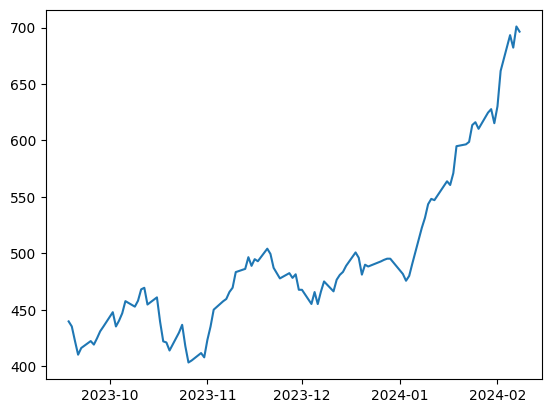

In [31]:
plt.plot(data, price)

Text(0.5, 1.0, 'NVDA')

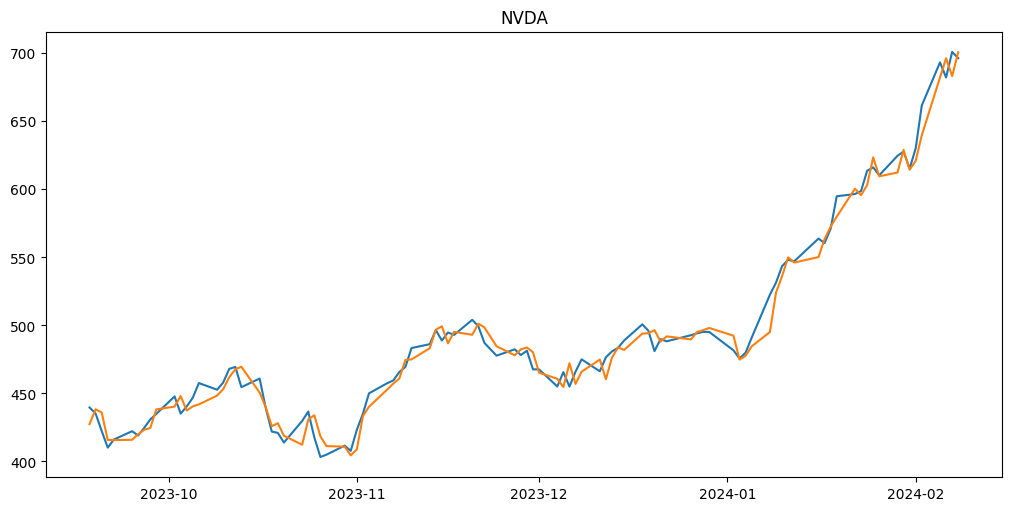

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='constrained')
ax.plot(data, price)
ax.plot(data, open)
ax.set_title('NVDA')

In [40]:
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

Получите аналогично данные AMD и Intel. Постройте график отображающий изменения стоимость акций 3 компаний.

In [47]:
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'AMD',
    'apikey': '0IS58K6Z51AOJO84'
}

r_2 = requests.get(url, params=params)
r_2.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'AMD',
  '3. Last Refreshed': '2024-02-08',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-02-08': {'1. open': '170.3300',
   '2. high': '172.1700',
   '3. low': '168.6000',
   '4. close': '169.3500',
   '5. volume': '43385275'},
  '2024-02-07': {'1. open': '169.4700',
   '2. high': '172.9700',
   '3. low': '168.2000',
   '4. close': '170.9400',
   '5. volume': '53665418'},
  '2024-02-06': {'1. open': '173.1500',
   '2. high': '173.8800',
   '3. low': '165.5000',
   '4. close': '167.8800',
   '5. volume': '68854127'},
  '2024-02-05': {'1. open': '179.0900',
   '2. high': '180.0100',
   '3. low': '171.1100',
   '4. close': '174.2300',
   '5. volume': '76349244'},
  '2024-02-02': {'1. open': '173.7900',
   '2. high': '179.0000',
   '3. low': '173.0500',
   '4. close': '177.6600',
   '5. volume': '82134266'},
  '2024-02-01': {'1. open': '169.

In [49]:
url = 'https://www.alphavantage.co/query'
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'INTC',
    'apikey': '0IS58K6Z51AOJO84'
}

r_3 = requests.get(url, params=params)
r_3.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'INTC',
  '3. Last Refreshed': '2024-02-08',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2024-02-08': {'1. open': '42.7200',
   '2. high': '42.9700',
   '3. low': '42.3300',
   '4. close': '42.5000',
   '5. volume': '33206470'},
  '2024-02-07': {'1. open': '42.8900',
   '2. high': '43.0950',
   '3. low': '42.5500',
   '4. close': '42.7800',
   '5. volume': '34269246'},
  '2024-02-06': {'1. open': '42.7000',
   '2. high': '42.7800',
   '3. low': '42.1400',
   '4. close': '42.7400',
   '5. volume': '34068216'},
  '2024-02-05': {'1. open': '42.6200',
   '2. high': '43.1500',
   '3. low': '42.4250',
   '4. close': '42.7700',
   '5. volume': '28890264'},
  '2024-02-02': {'1. open': '43.0000',
   '2. high': '43.1400',
   '3. low': '41.6000',
   '4. close': '42.6000',
   '5. volume': '53683500'},
  '2024-02-01': {'1. open': '43.1500',
   '2. high':

Text(0.5, 1.0, 'NVIDIA, AMD, Intel')

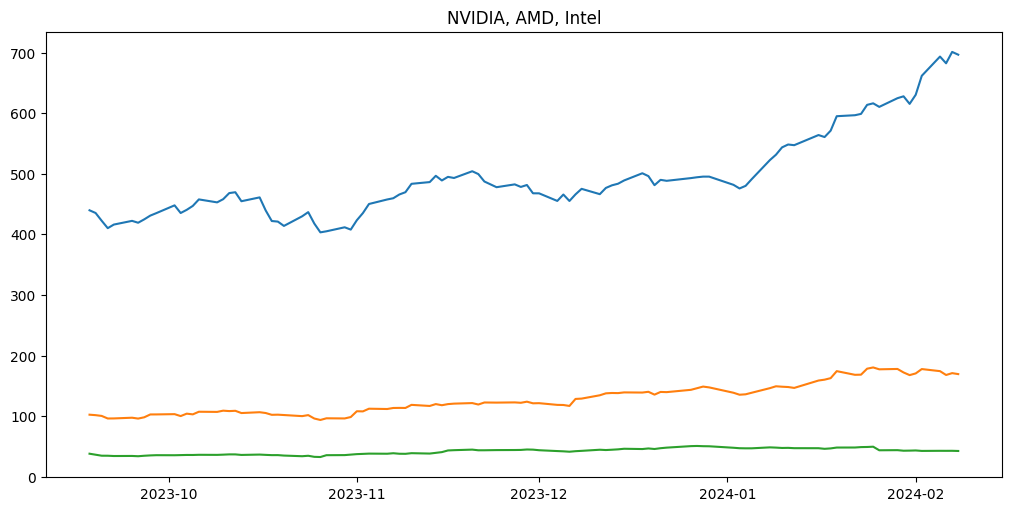

In [53]:
price_2 = []
price_3 = []

for d, v in r_2.json()['Time Series (Daily)'].items():
    price_2.append(float(v['4. close']))

for d, v in r_3.json()['Time Series (Daily)'].items():
    price_3.append(float(v['4. close']))

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='constrained')
ax.plot(data, price)
ax.plot(data, price_2)
ax.plot(data, price_3)
ax.set_title('NVIDIA, AMD, Intel')

Получите информацию о топ-3 криптовалютах: Bitcoin BTC, Ethereum ETH, Tether USDT. Постройте график с полученной информацией.